In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['first','second'])
data.head()

,first,second
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.insert(0,'b',1)
data.head()

,b,first,second
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [4]:
x = data.iloc[:,0:2]
X = np.matrix(x.values)
y = data.iloc[:,2:]
Y = np.matrix(y.values)
w = np.matrix(np.array([0, 0]))
w = np.float64(w)
X.shape,Y.shape,w.shape[1]

((97, 2), (97, 1), 2)

In [5]:
def computercost(X,Y,w):
    temp = np.power((X.dot(w.T) - Y),2)
    temp = np.sum(temp) / (2*len(X))
    return temp

In [6]:
def graident(X,Y,w,lr,iter):
    cost = np.zeros(iter)
    
    for i in range(iter):
        
        temp = X.dot(w.T) - Y
        temp_1 = np.multiply(temp,X[:,1]) / len(X)
        temp_2 = temp / len(X)
        temp_1 = np.sum(temp_1)
        temp_2 = np.sum(temp_2)
        
        w[0,0] = w[0,0] - lr * temp_2
        w[0,1] = w[0,1] - lr * temp_1
        cost[i] = computercost(X,Y,w)
    return w,cost
    
w ,cost = graident(X,Y,w,0.01,1000)
cost

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

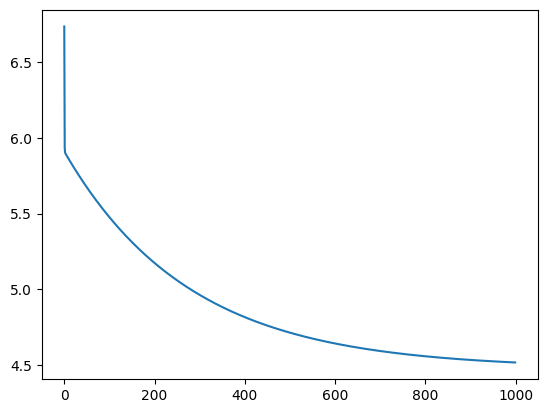

In [7]:
plt.plot(np.arange(1000),cost)
plt.show()